![alt text](2000px-Ford_GoBike_logo.svg-2.png "Logo Title Text 3")

## Dataset
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay Area. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.
This project has downloaded a provided dataset by [Lyft](https://s3.amazonaws.com/baywheels-data/index.html) for bike sharing data in the greater San Francisco Bay Area at July 2019 with approximately 20,000 bike-sharing data. Feature documentation is available [here](https://www.lyft.com/bikes/bay-wheels/system-data)

This project is investigating three key findings and one recommendation such as:
1. Bike Usage Trend Analysis Based on Time
2. Bike Usage Trend Analysis in Based on Member Age and Gender
3. Bike Usage Trend Analysis in Based on User Type
4. Recommendation for Bike Replenishment during Peak Hours

In [1]:
#Import Packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set (style = "darkgrid")

In [2]:
#Load FordGobike Dataset for July 2019
df = pd.read_csv('clean_df.csv')

#Load Bike Replenihsment Dataset
mor_bike_count = pd.read_csv('mor_bike_count.csv')
aft_bike_count = pd.read_csv('aft_bike_count.csv')

## Part 1: Bike Usage Analysis Based on Time
### Monthly - Weekly - Hourly Bike Usage Trend

Text(0, 0.5, 'Number of Bike Usage')

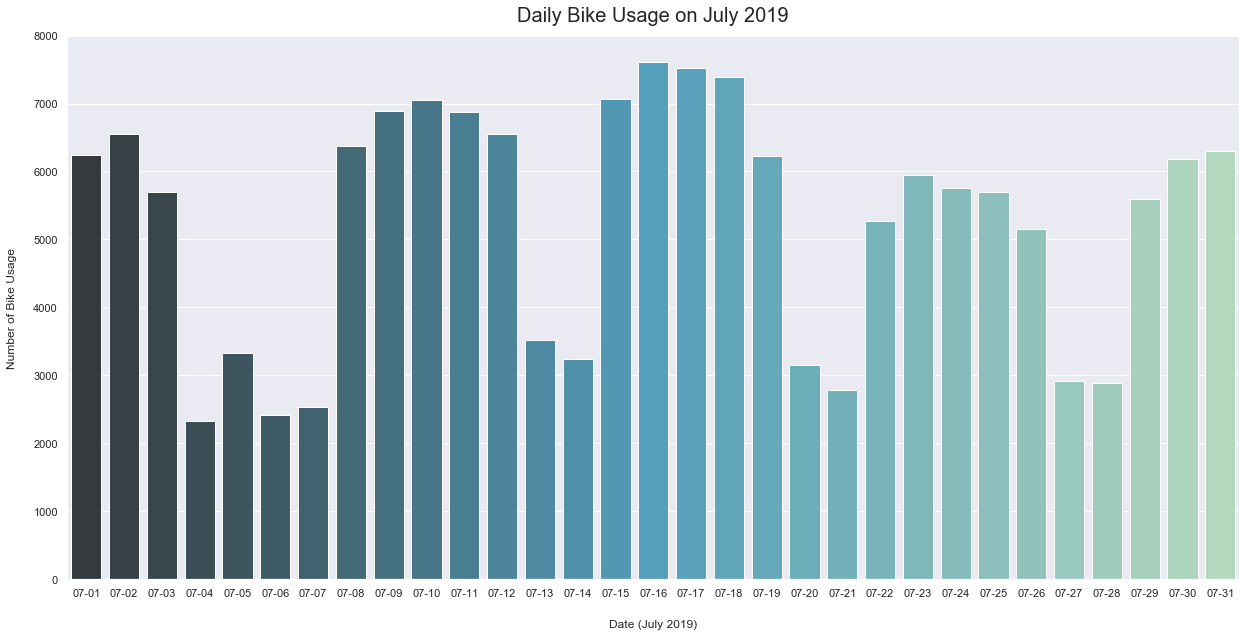

In [6]:
#Monthly based
plt.figure(figsize=[21, 10])
sns.countplot(x='start_time_date',palette="GnBu_d", data=df.sort_values(by='start_time_date'))
plt.title('Daily Bike Usage on July 2019', fontsize=20, y=1.015)
plt.xlabel('Date (July 2019)', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)

Text(0, 0.5, 'Number of Bike Usage')

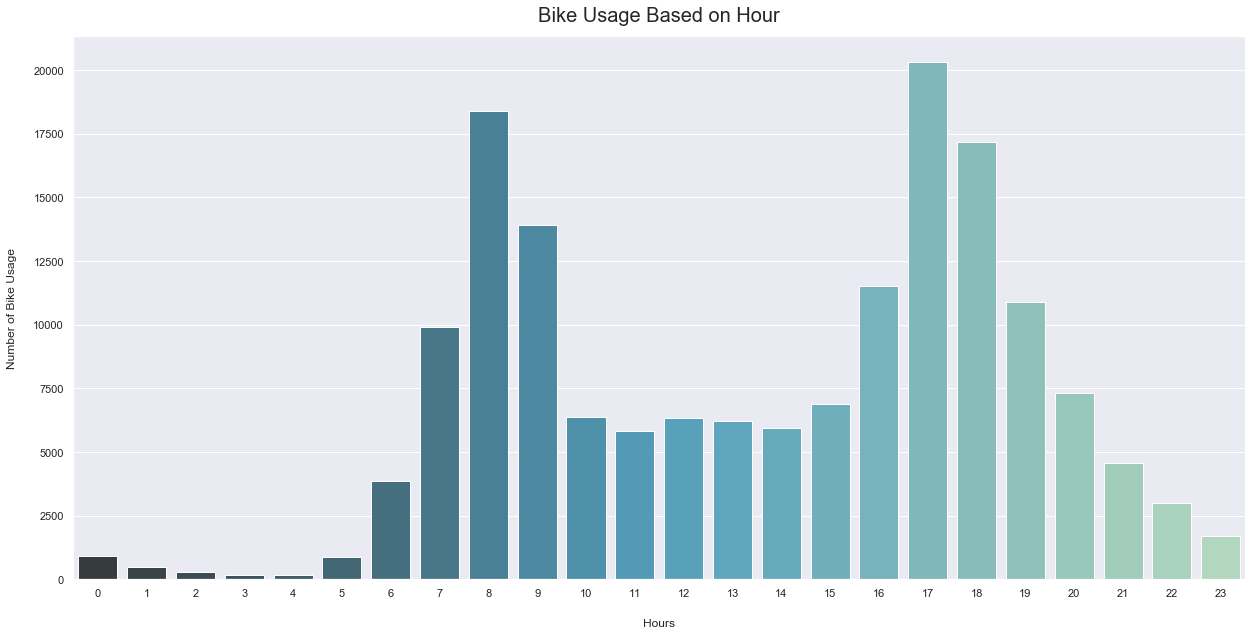

In [7]:
#Daily based
plt.figure(figsize=[21, 10])
sns.countplot(x='start_time_hour',palette = "GnBu_d", data=df.sort_values(by='start_time_hour'))
plt.title('Bike Usage Based on Hour', fontsize=20, y=1.015)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)

Text(0, 0.5, 'Number of Bike Usage')

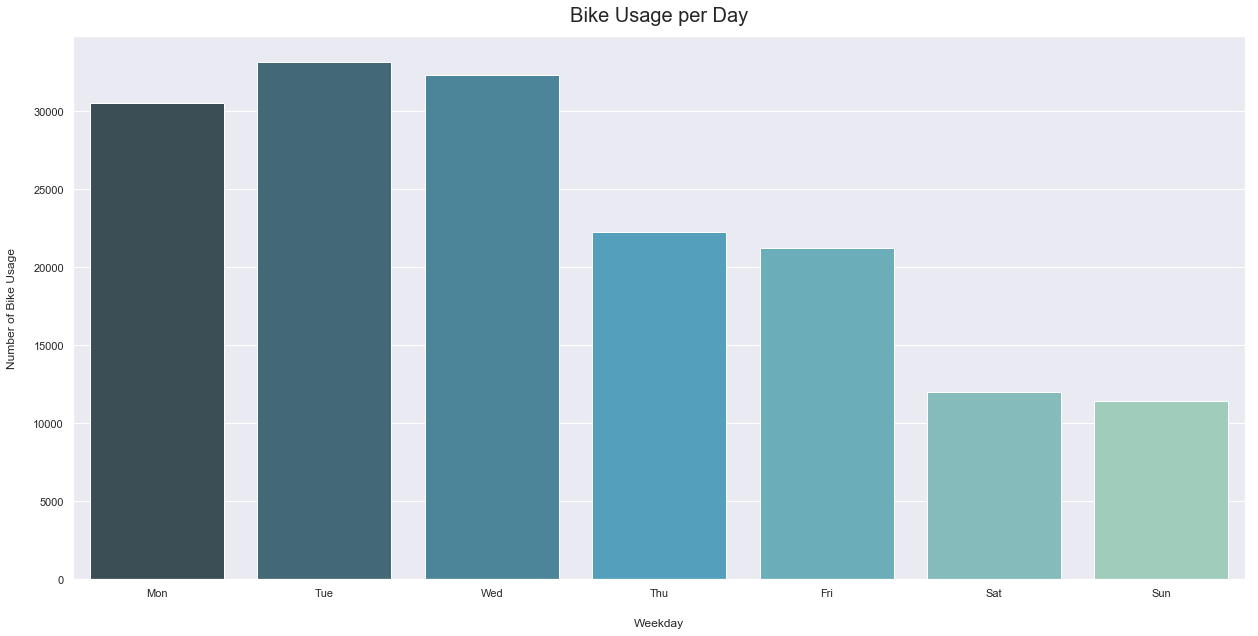

In [8]:
#Hourly based
plt.figure(figsize=[21, 10])
sns.countplot(x='start_time_weekday',palette = "GnBu_d", data=df.sort_values(by='start_time_date'))
plt.title('Bike Usage per Day', fontsize=20, y=1.015)
plt.xlabel('Weekday', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)

### Insights: 
Bike Usage Trend Analysis Based on Time
- Daily Bike Usage in June 2019 is shown as multimodal distribution where the peak bike usage volume is dominated by weekday
- Peak volume of bike usage are start from Monday until Wednesday
- Peak Hours of bike usage are start from 7-9 a.m and 4.7 p.m

## Part 2: Bike Usage Analysis in Based on Member Age and Gender

Text(0, 0.5, 'Number of Bike Usage')

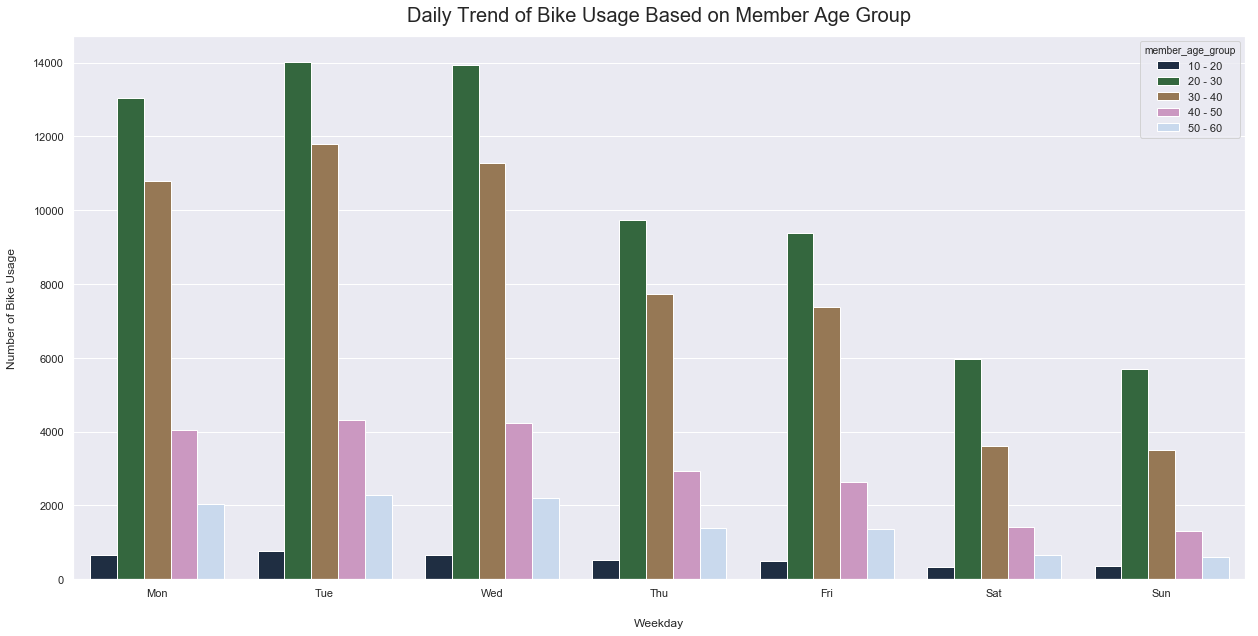

In [9]:
plt.figure(figsize=(21,10))
sns.countplot(x='start_time_weekday', hue='member_age_group',palette = "cubehelix", 
                   data=df.sort_values(
                       by=['start_time_date', 'member_age_group']))
plt.title('Daily Trend of Bike Usage Based on Member Age Group', fontsize=20, y=1.015)
plt.xlabel('Weekday', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)


Text(0, 0.5, 'Number of Bike Usage')

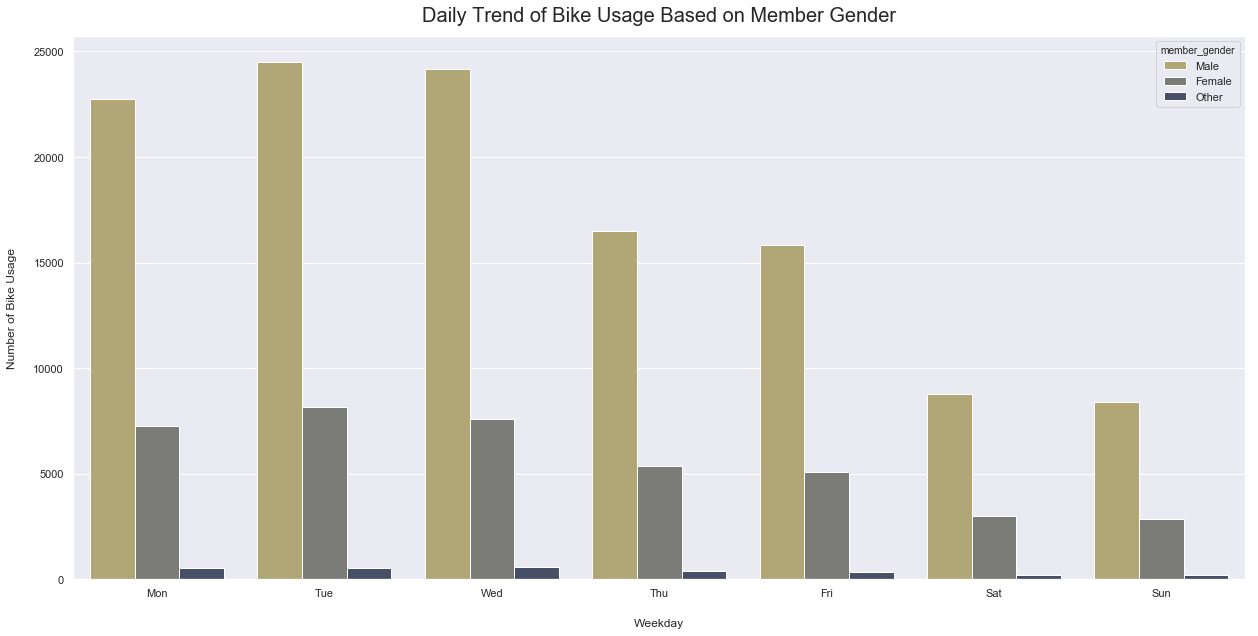

In [10]:
plt.figure(figsize=(21,10))
sns.countplot(x='start_time_weekday', hue='member_gender',palette = "cividis_r", 
                   data=df.sort_values(
                       by=['start_time_date',]))
plt.title('Daily Trend of Bike Usage Based on Member Gender', fontsize=20, y=1.015)
plt.xlabel('Weekday', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)

Text(0.5, 1.1, 'Daily Trend of Bike Usage Based on Member Age Group and Gender')

<Figure size 1512x720 with 0 Axes>

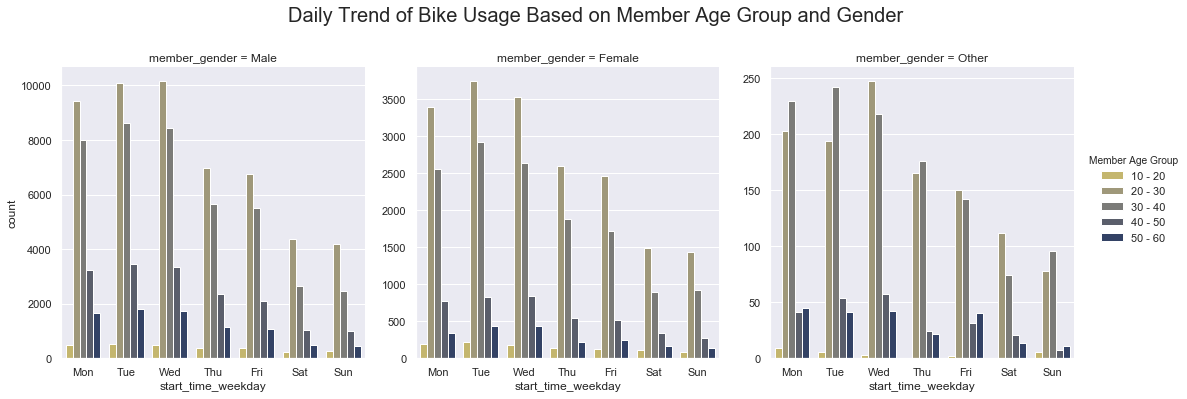

In [11]:
plt.figure(figsize=(21,10))
g=sns.catplot(x='start_time_weekday' , col='member_gender', hue='member_age_group',palette = "cividis_r", kind='count', data=df, hue_order=['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60'], order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], sharey=False)
g._legend.set_title('Member Age Group')
g.fig.suptitle("Daily Trend of Bike Usage Based on Member Age Group and Gender",fontsize=20, y=1.1)

### Insights: 
By conducting Bivariate exploration based on member age group, the above analysis shows that people in age between 20-40 years old are still the biggest market for the whole week regardless weekend or weekday. In general, number of bike usage trend based on daily is decreasing from Wednesday towards weekend and it applies to all age.

Based on the above bivariate explotation based on gender, number of males user are decreasing sharply from Wednesday towards weekend, while female and other gender user decrease gradually

Based on the above multivariate exploration, Male and Female user gender are having similar trend based on the member age where it is dominated by user with 20-30 years old and followed by 30-40 years old user for the whole of week. In contrast, there are slighly difference for other gender user, for Monday, Tuesday, Thursday and Sunday, user with 30-40 years old are slightly higher than user with 20-30 years old. On the otherhand Wednesday, Friday and Saturday, user with 20-30 years old is slightly higher than 30-40 yeards old. The rest of age member groups are generally similar and do not change significantly.

## Part 3: Bike Usage Analysis in Based on User Type
### Monthly - Weekly - Hourly Bike Usage Trend Based on User Type

Text(0, 0.5, 'Number of Bike Usage')

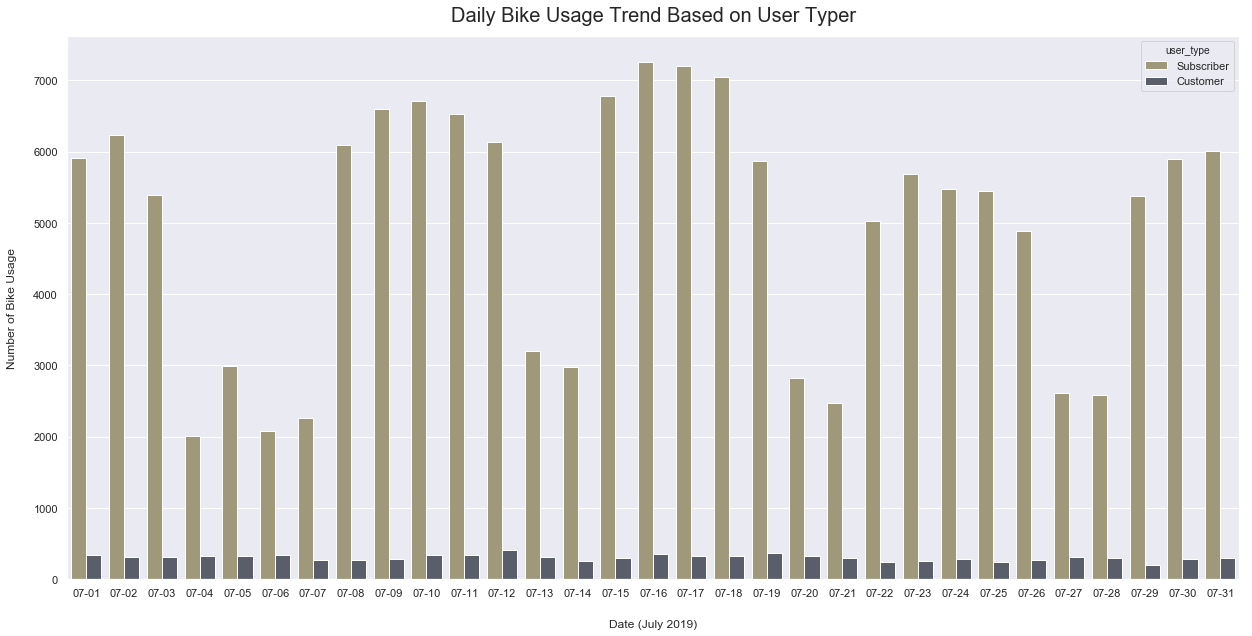

In [12]:
#Montly based
plt.figure(figsize=(21,10))
sns.countplot(x='start_time_date', hue='user_type',palette = "cividis_r",
                   data=df.sort_values(
                       by=['start_time_date'])).set_title('Monthly Bike Usage Trend Based on User Type')
plt.title('Daily Bike Usage Trend Based on User Typer', fontsize=20, y=1.015)
plt.xlabel('Date (July 2019)', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)


Text(0, 0.5, 'Number of Bike Usage')

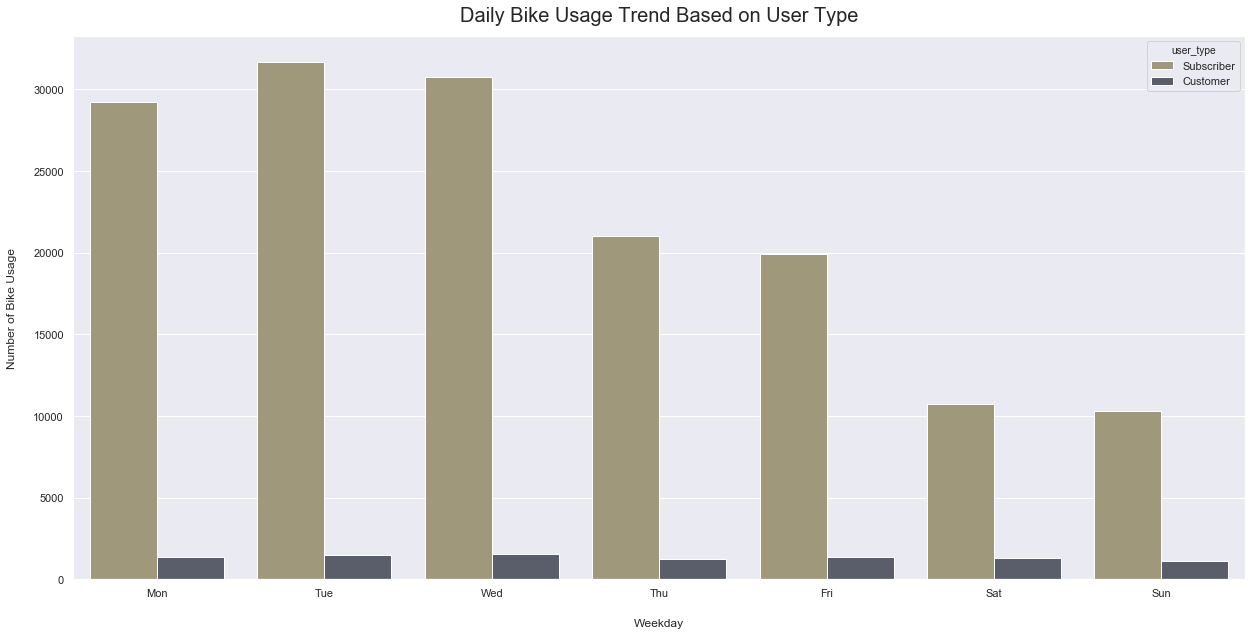

In [13]:
#Daily based
plt.figure(figsize=(21,10))
sns.countplot(x='start_time_weekday', hue='user_type',palette = "cividis_r",  
                   data=df.sort_values(
                       by=['start_time_date']))

plt.title('Daily Bike Usage Trend Based on User Type', fontsize=20, y=1.015)
plt.xlabel('Weekday', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)

Text(0, 0.5, 'Number of Bike Usage')

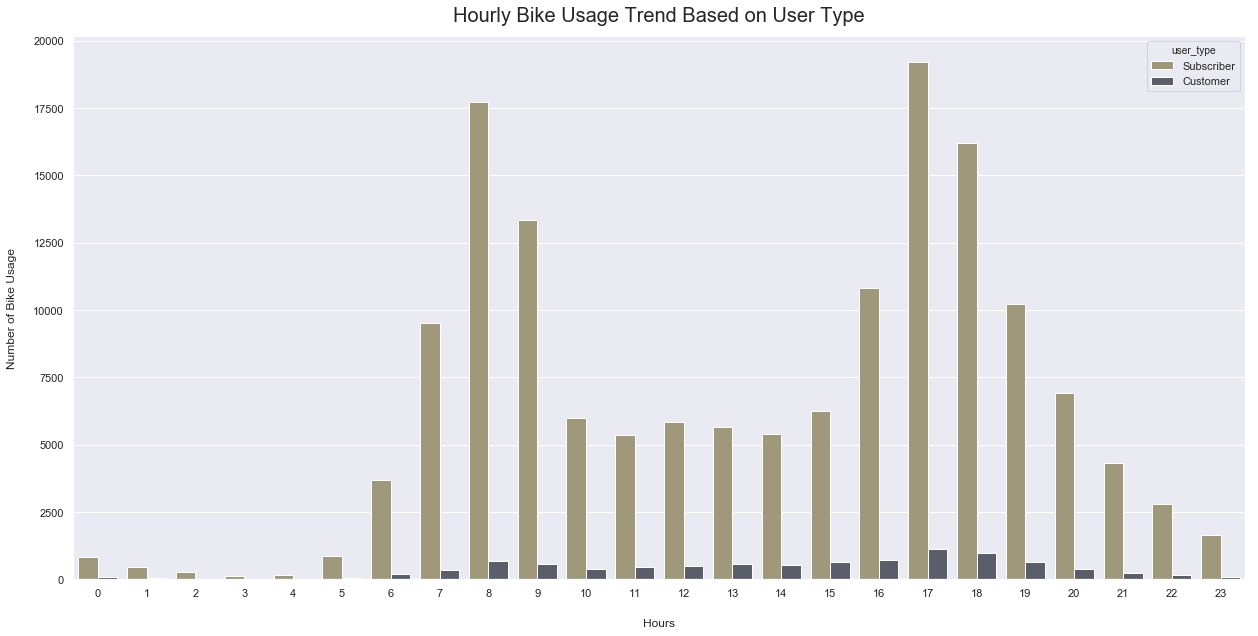

In [14]:
#Hourly Based
plt.figure(figsize=(21,10))
sns.countplot(x='start_time_hour', hue='user_type',palette = "cividis_r", 
                   data=df.sort_values(
                       by=['start_time_date'])).set_title('Hourly Bike Usage Trend Based on User Type')
plt.title('Hourly Bike Usage Trend Based on User Type', fontsize=20, y=1.015)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Bike Usage', labelpad=16)

### Insights: 
From the above three charts, the charts consistently show that Subscriber are taking the biggest portion of the market compared with regular customer disregards the time period (Monthly, Daily and Hourly).
In deeper analysis, the trend of bike usage based on regular customer are generaly constant and the fluctuation is not as big as the fluctation in subscriber. The trend of bike usage based on customer reach the peak point during the weekday, especially on Monday, Tuesday, and Wednesday at morning peak hours (7-9 a.m) and afternoon peak hours (4-7 p.m).

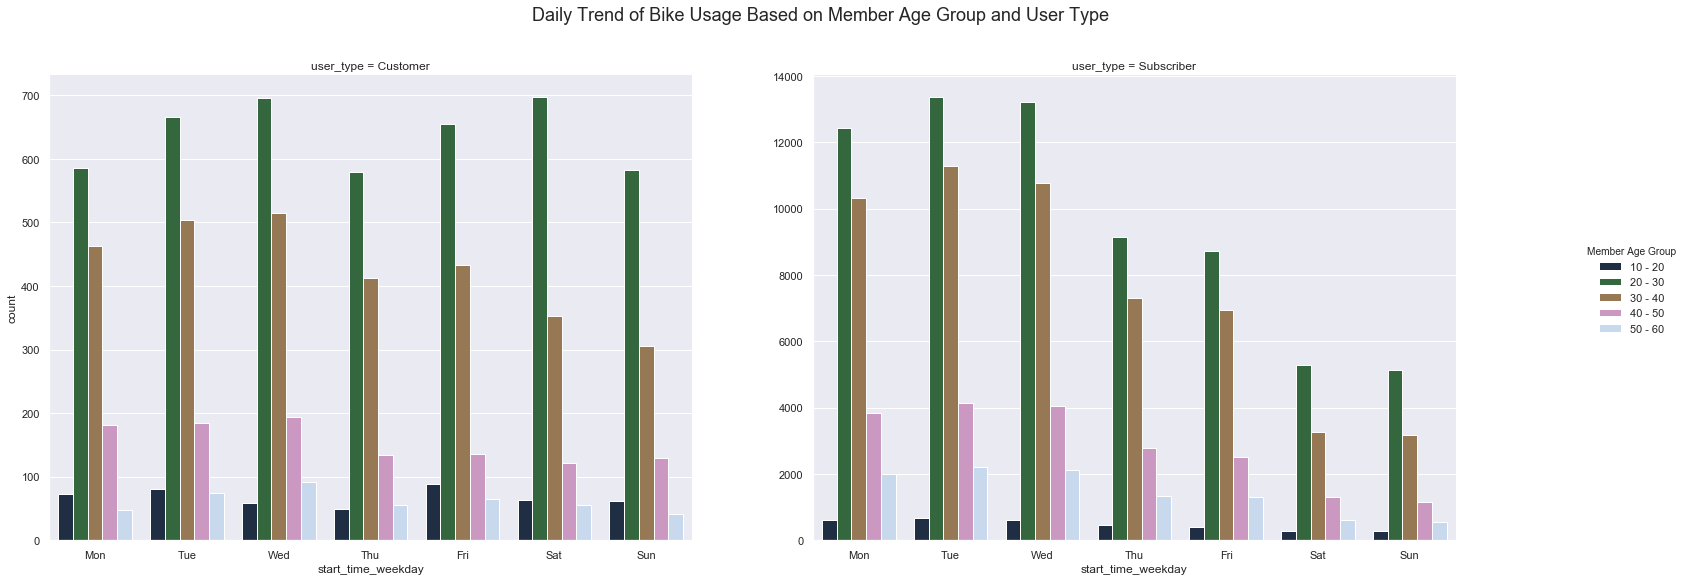

In [27]:
g=sns.catplot(x='start_time_weekday', col='user_type', hue='member_age_group',palette = "cubehelix", kind='count', data=df, hue_order=['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60'], order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], sharey=False)
g._legend.set_title('Member Age Group')
g.fig.suptitle('Daily Trend of Bike Usage Based on Member Age Group and User Type', fontsize=18, y=1.05)
g.fig.set_size_inches(24,8)

### Insights: 
The above chart shows the relationship between bike usage with type of member and member age. the chart shows similar trend with the previous multivariate exploration where bike usage are dominated by users age in between 20-40 years, followed by 40-50 years, 50-60 years, and 10-20 years. 

Going deeper in trend of bike usage based customer type, it shows that user with 20-30 years old has sideways trend during the whole week. While the second and third bigger users based on age (30-40 years and 40-50 years) tend to decline towards weekend. This trends is similar with the trend on subscriber trend where all the member age has same trend that number of bike usage is declining towards weekend, start from Wednesday to Sunday.

## Part 4: Requirement of Bike Replenishment During The Peak Hours

#### Requirement of Bike Replenishment during the Morning Peak Hours

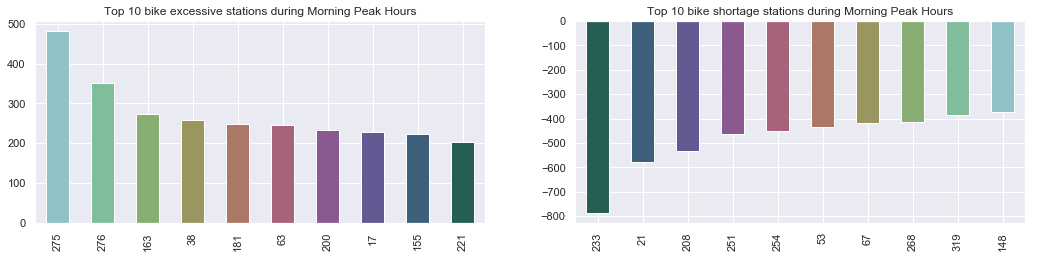

In [29]:
#Morning peak hours: 7-9 a.m
#ploting bike excessive and shortage stations during morning peak hours
figure, axes = plt.subplots(1,2)
figure.set_figheight(2)
figure.set_figwidth(10)
plt.subplots_adjust(left=0.125, bottom = 0.1, top = 1.5, right = 1.5, wspace=0.2, hspace=0.5)

#Bike shortage
mor_shortage = mor_bike_count ['difference'].nsmallest(10).plot(kind='bar', ax=axes[1], color = sns.cubehelix_palette(10, start=0, rot=2.6, dark=0.7, light=.3, reverse=False)).set_title('Top 10 bike shortage stations during Morning Peak Hours')

#Bike excessive
mor_excess= mor_bike_count['difference'].nlargest(10).plot(kind='bar', ax=axes[0], color = sns.cubehelix_palette(10, start=0, rot=2.6, dark=0.7, light=.3, reverse=True)).set_title('Top 10 bike excessive stations during Morning Peak Hours')


For **Morning Peak Hours**, these are recommendation for stations that need to be replenished based on the prioritization:

**From:**
1. San Francisco Caltrain (Townsend St at 4th St)
2. San Francisco Caltrain Station 2 (Townsend St at 4th St)
3. Grand Ave At Perkins St
4. 2nd Ave at E 18th St
5. Hubbell St at 16th St

**To:**
1. Montgomery St BART Station (Market St at 2nd St)
2. 19th Street BART Station
3. MacArthur BART Station
4. Post St at Keanny St
5. Powell St BART Station (Market St at 4th St)

#### Requirement of Bike Replenishment during the Afternoon Peak Hours

<Figure size 1058.4x595.44 with 0 Axes>

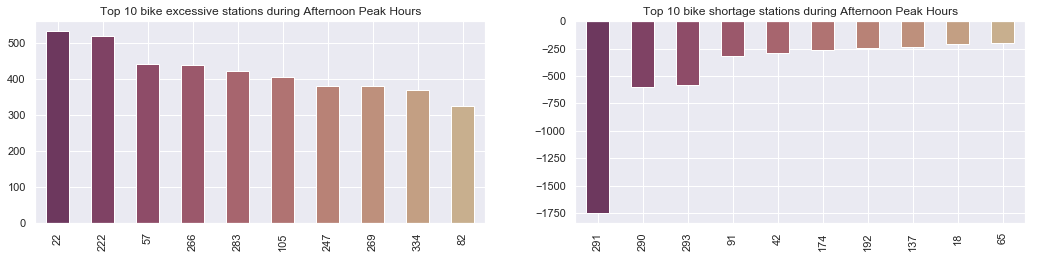

In [8]:
#ploting bike excessive and shortage stations during afternoon peak hours
plt.figure(figsize=[14.70, 8.27])
figure, axes = plt.subplots(1,2)
figure.set_figheight(2)
figure.set_figwidth(10)
plt.subplots_adjust(left=0.125, bottom = 0.1, top = 1.5, right = 1.5, wspace=0.2, hspace=0.5)

#Afternoon Bike shortage
aft_shortage = aft_bike_count['difference'].nsmallest(10).plot(kind='bar', ax=axes[1], color = sns.cubehelix_palette(10, start=0, rot=.6, dark=0.7, light=.3, reverse=False)).set_title('Top 10 bike shortage stations during Afternoon Peak Hours')

#Afternoon Bike excessive
aft_excess= aft_bike_count['difference'].nlargest(10).plot(kind='bar', ax=axes[0], color = sns.cubehelix_palette(10, start=0, rot=.6, dark=0.7, light=.3, reverse=False)).set_title('Top 10 bike excessive stations during Afternoon Peak Hours')


For **Afternoon Peak Hours**, these are recommendation for stations that need to be replenished based on the prioritization:

**From:**
1. 19th Street BART Station
2. MacArthur BART Station
3. 4th St at 16th St
4. Post St at Keanny St
5. Salesforce Transit Center (Natoma St at 2nd St)
    
**To:**
1. San Francisco Caltrain Station 2 (Townsend St at 4th St)
2. San Francisco Caltrain (Townsend St at 4th St)
3. San Francisco Ferry Building (Harry Birdges Plaza)

(Note: Due to the large bike shortage number in San Francisco Caltrain Station 2, the prioritization of bike replenishment is only made in those 3 stations by considering the balance of bike excessive and shortage)

## Limitation

1. Distance between station to another station is not investigated in this project since it requeries further study about San Fransisco Map. Therefore, the data about longitude and latitude was dropped since it is not relevant to this project
2. Further mapping studies are also required to optimize the bike replenishment recommendation by considering distance from 1 station to another station and also congestion data would be an important information.